In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low= -180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import Citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
    
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key    

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city}") 
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| cabo san lucas
Processing Record 2 of Set 1| adre
Processing Record 3 of Set 1| ushuaia
Processing Record 4 of Set 1| rikitea
Processing Record 5 of Set 1| olafsvik
Processing Record 6 of Set 1| teguldet
Processing Record 7 of Set 1| saskylakh
Processing Record 8 of Set 1| umm lajj
Processing Record 9 of Set 1| castro
Processing Record 10 of Set 1| antsohihy
Processing Record 11 of Set 1| nizhniy baskunchak
Processing Record 12 of Set 1| pangnirtung
Processing Record 13 of Set 1| albany
Processing Record 14 of Set 1| butaritari
Processing Record 15 of Set 1| tasbuget
City not found. Skipping...
Processing Record 16 of Set 1| hailar
Processing Record 17 of Set 1| port hedland
Processing Record 18 of Set 1| punta arenas
Processing Record 19 of Set 1| tazovskiy
Processing Record 20 of Set 1| khatanga
Processing Record 21 of Set 1| oistins
Processing Record 22 of Set 1| kumbo
Processing Record 23 of S

Processing Record 39 of Set 4| buraydah
Processing Record 40 of Set 4| lata
Processing Record 41 of Set 4| dalbandin
Processing Record 42 of Set 4| tutoia
Processing Record 43 of Set 4| samusu
City not found. Skipping...
Processing Record 44 of Set 4| kansanshi
Processing Record 45 of Set 4| shimanovsk
Processing Record 46 of Set 4| mandiana
Processing Record 47 of Set 4| beringovskiy
Processing Record 48 of Set 4| pishin
Processing Record 49 of Set 4| isangel
Processing Record 50 of Set 4| coquimbo
Processing Record 1 of Set 5| vostok
Processing Record 2 of Set 5| seoul
Processing Record 3 of Set 5| tiksi
Processing Record 4 of Set 5| puerto quijarro
Processing Record 5 of Set 5| havelock
Processing Record 6 of Set 5| huari
Processing Record 7 of Set 5| barentsburg
City not found. Skipping...
Processing Record 8 of Set 5| uige
Processing Record 9 of Set 5| sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5| severo-kurilsk
Processing Record 11 of Set 5| machico
Proc

Processing Record 32 of Set 8| sorvag
City not found. Skipping...
Processing Record 33 of Set 8| arraial do cabo
Processing Record 34 of Set 8| katobu
Processing Record 35 of Set 8| palmetto
Processing Record 36 of Set 8| yulara
Processing Record 37 of Set 8| satana
Processing Record 38 of Set 8| huehuetan
Processing Record 39 of Set 8| coahuayana
Processing Record 40 of Set 8| mutsamudu
City not found. Skipping...
Processing Record 41 of Set 8| saint-georges
Processing Record 42 of Set 8| waipawa
Processing Record 43 of Set 8| samarai
Processing Record 44 of Set 8| mahanoro
Processing Record 45 of Set 8| tabou
Processing Record 46 of Set 8| mabaruma
Processing Record 47 of Set 8| lompoc
Processing Record 48 of Set 8| campo do brito
Processing Record 49 of Set 8| soe
Processing Record 50 of Set 8| nipawin
Processing Record 1 of Set 9| lebu
Processing Record 2 of Set 9| north auburn
Processing Record 3 of Set 9| aklavik
Processing Record 4 of Set 9| havre-saint-pierre
Processing Record 

Processing Record 26 of Set 12| san policarpo
Processing Record 27 of Set 12| kununurra
Processing Record 28 of Set 12| suluq
Processing Record 29 of Set 12| kegayli
City not found. Skipping...
Processing Record 30 of Set 12| banmo
City not found. Skipping...
Processing Record 31 of Set 12| phalaborwa
Processing Record 32 of Set 12| ust-koksa
Processing Record 33 of Set 12| vila do maio
Processing Record 34 of Set 12| nokha
Processing Record 35 of Set 12| yeletskiy
City not found. Skipping...
Processing Record 36 of Set 12| vardo
Processing Record 37 of Set 12| lazaro cardenas
Processing Record 38 of Set 12| qasigiannguit
Processing Record 39 of Set 12| camana
Processing Record 40 of Set 12| ketchikan
Processing Record 41 of Set 12| qandala
Processing Record 42 of Set 12| ozinki
Processing Record 43 of Set 12| cairo
Processing Record 44 of Set 12| sim
Processing Record 45 of Set 12| troitsko-pechorsk
Processing Record 46 of Set 12| mount isa
Processing Record 47 of Set 12| verkhneye du

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,76.51,58,5,4.00,MX,2022-01-28 23:58:42
1,Adre,13.4667,22.2000,57.78,17,10,14.97,TD,2022-01-28 23:59:13
2,Ushuaia,-54.8000,-68.3000,60.46,59,40,3.44,AR,2022-01-28 23:59:14
3,Rikitea,-23.1203,-134.9692,78.26,69,100,14.18,PF,2022-01-28 23:59:14
4,Olafsvik,64.8945,-23.7142,23.54,65,63,13.56,IS,2022-01-28 23:59:14
5,Teguldet,57.3064,88.1667,1.83,97,97,4.74,RU,2022-01-28 23:59:15
6,Saskylakh,71.9167,114.0833,-1.75,92,100,5.57,RU,2022-01-28 23:58:16
7,Umm Lajj,25.0213,37.2685,60.48,49,2,13.35,SA,2022-01-28 23:59:15
8,Castro,-24.7911,-50.0119,60.19,99,100,9.01,BR,2022-01-28 23:56:50
9,Antsohihy,-14.8796,47.9875,73.58,89,7,2.37,MG,2022-01-28 23:59:16


In [14]:
# Reorder the columns as city, country, date, lat, lng, max temp, humidity, cloudiness, and wind speed.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-01-28 23:58:42,22.8909,-109.9124,76.51,58,5,4.00
1,Adre,TD,2022-01-28 23:59:13,13.4667,22.2000,57.78,17,10,14.97
2,Ushuaia,AR,2022-01-28 23:59:14,-54.8000,-68.3000,60.46,59,40,3.44
3,Rikitea,PF,2022-01-28 23:59:14,-23.1203,-134.9692,78.26,69,100,14.18
4,Olafsvik,IS,2022-01-28 23:59:14,64.8945,-23.7142,23.54,65,63,13.56
5,Teguldet,RU,2022-01-28 23:59:15,57.3064,88.1667,1.83,97,97,4.74
6,Saskylakh,RU,2022-01-28 23:58:16,71.9167,114.0833,-1.75,92,100,5.57
7,Umm Lajj,SA,2022-01-28 23:59:15,25.0213,37.2685,60.48,49,2,13.35
8,Castro,BR,2022-01-28 23:56:50,-24.7911,-50.0119,60.19,99,100,9.01
9,Antsohihy,MG,2022-01-28 23:59:16,-14.8796,47.9875,73.58,89,7,2.37


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

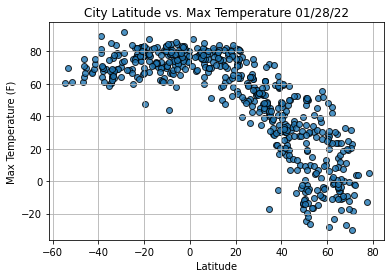

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph prperties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

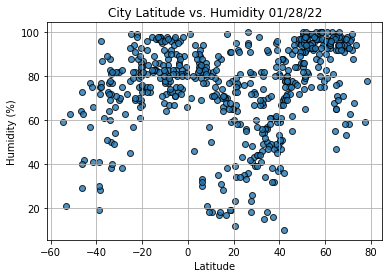

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

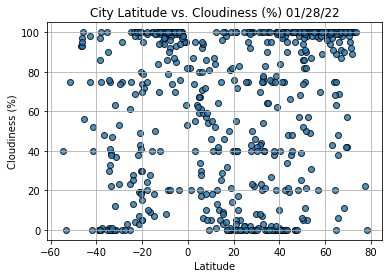

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

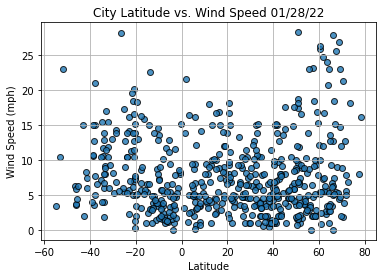

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-01-28 23:59:17
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.82
Humidity                       79
Cloudiness                     55
Wind Speed                  16.42
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-01-28 23:58:42,22.8909,-109.9124,76.51,58,5,4.00
1,Adre,TD,2022-01-28 23:59:13,13.4667,22.2000,57.78,17,10,14.97
4,Olafsvik,IS,2022-01-28 23:59:14,64.8945,-23.7142,23.54,65,63,13.56
5,Teguldet,RU,2022-01-28 23:59:15,57.3064,88.1667,1.83,97,97,4.74
6,Saskylakh,RU,2022-01-28 23:58:16,71.9167,114.0833,-1.75,92,100,5.57


In [24]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-01-28 23:58:42,22.8909,-109.9124,76.51,58,5,4.00
1,Adre,TD,2022-01-28 23:59:13,13.4667,22.2000,57.78,17,10,14.97
4,Olafsvik,IS,2022-01-28 23:59:14,64.8945,-23.7142,23.54,65,63,13.56
5,Teguldet,RU,2022-01-28 23:59:15,57.3064,88.1667,1.83,97,97,4.74
6,Saskylakh,RU,2022-01-28 23:58:16,71.9167,114.0833,-1.75,92,100,5.57


In [25]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ushuaia,AR,2022-01-28 23:59:14,-54.8000,-68.3000,60.46,59,40,3.44
3,Rikitea,PF,2022-01-28 23:59:14,-23.1203,-134.9692,78.26,69,100,14.18
8,Castro,BR,2022-01-28 23:56:50,-24.7911,-50.0119,60.19,99,100,9.01
9,Antsohihy,MG,2022-01-28 23:59:16,-14.8796,47.9875,73.58,89,7,2.37
15,Port Hedland,AU,2022-01-28 23:59:18,-20.3167,118.5667,82.45,69,80,13.80


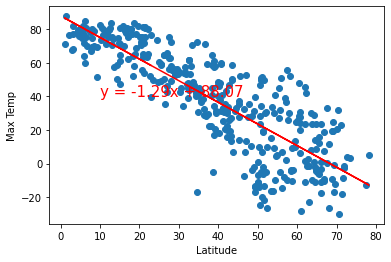

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,40))

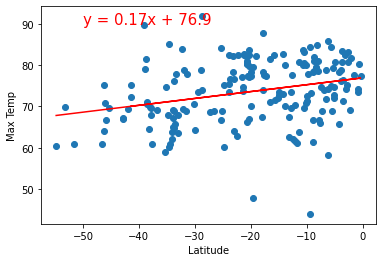

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", "Max Temp",(-50,90))

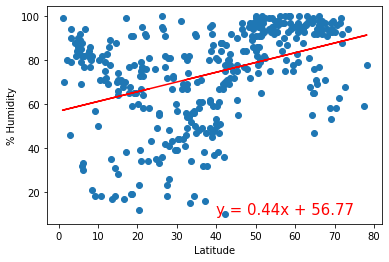

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

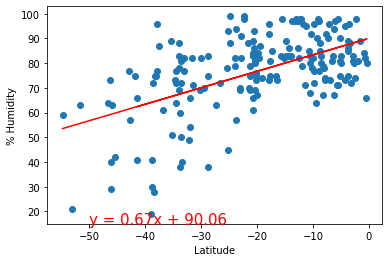

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

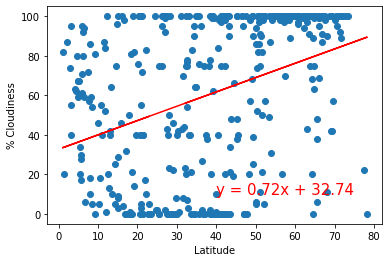

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for % Cloudiness", "% Cloudiness",(40,10))

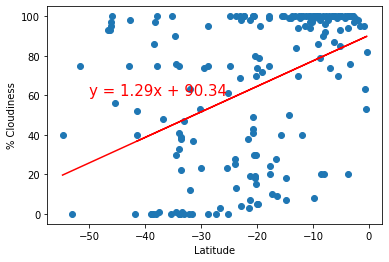

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

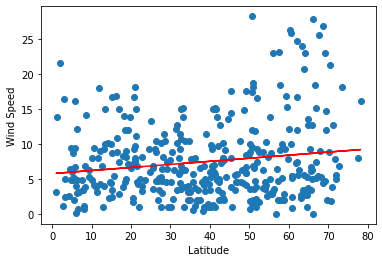

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

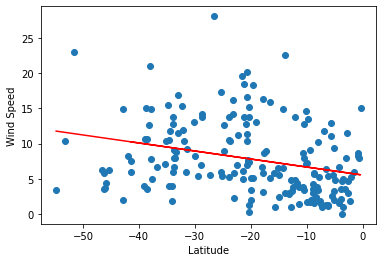

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))